In [1]:
from numpy import *
from matplotlib import pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [2]:
def N(a): # Normalization of Gaussian below, ensures total probability is 1
    val = integrate.quad(lambda x: e**(-x**2/(2*a)),-inf,inf)
    return 1/val[0]

def prob_x_given_a(x,a):
    '''
    Returns P(x|a), prob of x given a
    mean = 0, variance = a
    x = input sample
    '''
    return N(a) * e**(-x**2/(2*a))

x = linspace(-10,10,101)
a = 1

In [3]:
# Check that integrated probability adds up to 1
integrate.quad(lambda x: prob_x_given_a(x,a),-inf,inf)

(0.9999999999999999, 7.619031656308536e-09)

In [16]:
# Bayes Theorem
# P(A|B) = P(B|A) * P(A) / P(B)

def prob_a_given_x(a,x):
    # Assuming P(a) = 1 (uniform prior) and x is an array of samples
    # return prob_x_given_a(x,a)
    arr = []
    for i in x:
        arr.append(i**2)
    
    arr2 = []
    for i in a:
        arr2.append((N(i))**len(x) * e**(-sum(arr)/(2*i)))
    return arr2



In [25]:
def random_100_samples():
    arr = []
    count = 1
    while count < 101:
        arr.append(random.randint(-10, 10))
        count += 1
    return arr

[2, 6, 3, -7, 5, -8, -4, 9, -7, -1, -5, 2, 6, -8, 6, -7, 2, 4, 8, 3, -10, 1, -5, 0, -10, 3, -6, -7, 8, 2, -10, 8, -3, 3, -6, 7, -7, 2, -8, 4, -5, -6, -3, -2, -4, 5, -5, 1, -10, 3, 0, -7, 2, -4, 4, -3, -9, 3, -3, -6, -3, 7, 7, 2, -2, -9, -4, -8, -3, -7, 4, -3, 1, 8, 0, 9, -2, 4, -6, 2, -10, 2, 4, -10, -7, 0, -5, 2, 0, -9, 0, -1, -2, 8, 8, -6, 4, 0, -9, -2]


Text(0, 0.5, 'P(a|{x})')

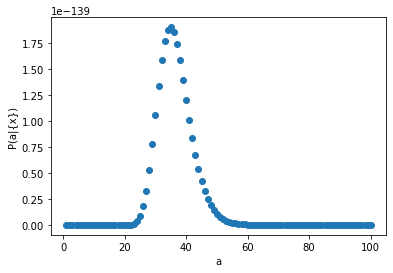

In [34]:
x_arr = random_100_samples()

arr = linspace(1,100,100)
plt.scatter(arr,prob_a_given_x(arr,x_arr))
plt.xlabel('a')
plt.ylabel('P(a|{x})')

In [41]:
def MHalgorithm(a, x):
    x0 = x_arr[0]
    time = [0]
    arr = [x0]
    t = 0
    for i in x_arr:
        A = min(1,prob_x_given_a(x0,a)/prob_x_given_a(i,a))
        u = random.uniform(0,1)
        
        if u <= A:
            x0 = i
        else:
            x0 = x0
        arr.append(x0)
        t += 1
        time.append(t)
        
    return time,arr

print(MHalgorithm(1,x_arr))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-5, -5, -6, -6, -8, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10])


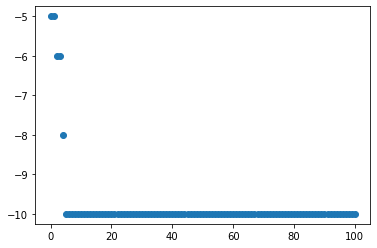

In [42]:
plt.scatter(MHalgorithm(1,x_arr)[0],MHalgorithm(1,x_arr)[1])